In [1]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo_1.csv")
# match_data_unfiltered.to_excel("exel_test.xlsx")

In [3]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 0
    elif result == "H":
        return 1
    elif result == "A":
        return 2
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [4]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.tail(n=5)

index  Unnamed: 0.1  Unnamed: 0.1.1 Div        Date      HomeTeam  \
4891   4891          4891             301  D1  14/05/2022         Mainz   
4892   4892          4892             302  D1  14/05/2022    M'gladbach   
4893   4893          4893             303  D1  14/05/2022     Stuttgart   
4894   4894          4894             304  D1  14/05/2022  Union Berlin   
4895   4895          4895             305  D1  14/05/2022     Wolfsburg   

           AwayTeam  FTHG  FTAG  FTR  ...  HomeAttack  HomeDefend AwayAttack  \
4891  Ein Frankfurt     2     2    0  ...    2.001489   -1.884149   1.172358   
4892     Hoffenheim     5     1    1  ...    3.347095   -1.133621   1.647127   
4893        FC Koln     2     1    1  ...    1.491069   -1.100222   1.535998   
4894         Bochum     3     2    1  ...    2.870488   -1.234870   1.944127   
4895  Bayern Munich     2     2    0  ...    1.994849   -1.248584   2.255671   

      AwayDefend  HomeAttackOld  HomeDefendOld  AwayAttackOld  AwayDefendOld  \
4891   -1.581157       1.868412      -1.545160       0.652603      -1.330148   
4892   -4.249006       2.048918      -1.426219       2.062127      -3.467829   
4893   -1.369941       0.963734      -1.335884       1.877641      -0.890119   
4894   -2.321089       2.570349      -0.727307       1.757577      -1.887840   
4895   -1.869960       1.949939      -0.849493       2.258790      -1.790906   

      HomeEloOld   AwayEloOld  
4891  849.372072   844.265646  
4892  877.665071   855.590835  
4893  734.655957   762.003692  
4894  746.240131   389.650242  
4895  825.333792  1118.372385  

[5 rows x 183 columns]

In [5]:
match_data_unfiltered['DiffElo'] = 0
match_data_unfiltered['DiffAttack'] = 0
match_data_unfiltered['DiffDefend'] = 0
match_data_unfiltered.tail()

index  Unnamed: 0.1  Unnamed: 0.1.1 Div        Date      HomeTeam  \
4891   4891          4891             301  D1  14/05/2022         Mainz   
4892   4892          4892             302  D1  14/05/2022    M'gladbach   
4893   4893          4893             303  D1  14/05/2022     Stuttgart   
4894   4894          4894             304  D1  14/05/2022  Union Berlin   
4895   4895          4895             305  D1  14/05/2022     Wolfsburg   

           AwayTeam  FTHG  FTAG  FTR  ...  AwayDefend  HomeAttackOld  \
4891  Ein Frankfurt     2     2    0  ...   -1.581157       1.868412   
4892     Hoffenheim     5     1    1  ...   -4.249006       2.048918   
4893        FC Koln     2     1    1  ...   -1.369941       0.963734   
4894         Bochum     3     2    1  ...   -2.321089       2.570349   
4895  Bayern Munich     2     2    0  ...   -1.869960       1.949939   

     HomeDefendOld  AwayAttackOld  AwayDefendOld  HomeEloOld   AwayEloOld  \
4891     -1.545160       0.652603      -1.330148  849.372072   844.265646   
4892     -1.426219       2.062127      -3.467829  877.665071   855.590835   
4893     -1.335884       1.877641      -0.890119  734.655957   762.003692   
4894     -0.727307       1.757577      -1.887840  746.240131   389.650242   
4895     -0.849493       2.258790      -1.790906  825.333792  1118.372385   

      DiffElo  DiffAttack  DiffDefend  
4891        0           0           0  
4892        0           0           0  
4893        0           0           0  
4894        0           0           0  
4895        0           0           0  

[5 rows x 186 columns]

In [6]:
def difference(home, away):
    diff = home - away
    return diff
difference(5, 10)

-5

In [7]:
z = 0
while z < len(match_data_unfiltered):

    homeeloold = match_data_unfiltered.HomeEloOld[z]
    awayeloold = match_data_unfiltered.AwayEloOld[z]

    homeattackold = match_data_unfiltered.HomeAttackOld[z]
    awayattackold = match_data_unfiltered.AwayAttackOld[z]

    homedefendold = match_data_unfiltered.HomeDefendOld[z]
    awaydefendold = match_data_unfiltered.AwayDefendOld[z]

    diffelo = difference(homeeloold, awayeloold)
    diffattack = difference(homeattackold, awayattackold)
    diffdefend = difference(homedefendold, awaydefendold)

    match_data_unfiltered['DiffElo'][z] = diffelo
    match_data_unfiltered['DiffAttack'][z] = diffattack
    match_data_unfiltered['DiffDefend'][z] = diffdefend

    z += 1

<ipython-input-7-417d5b4c2b24>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data_unfiltered['DiffElo'][z] = diffelo
<ipython-input-7-417d5b4c2b24>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data_unfiltered['DiffAttack'][z] = diffattack
<ipython-input-7-417d5b4c2b24>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data_unfiltered['DiffDefend'][z] = diffdefend


In [8]:
match_data_unfiltered.tail()

index  Unnamed: 0.1  Unnamed: 0.1.1 Div        Date      HomeTeam  \
4891   4891          4891             301  D1  14/05/2022         Mainz   
4892   4892          4892             302  D1  14/05/2022    M'gladbach   
4893   4893          4893             303  D1  14/05/2022     Stuttgart   
4894   4894          4894             304  D1  14/05/2022  Union Berlin   
4895   4895          4895             305  D1  14/05/2022     Wolfsburg   

           AwayTeam  FTHG  FTAG  FTR  ...  AwayDefend  HomeAttackOld  \
4891  Ein Frankfurt     2     2    0  ...   -1.581157       1.868412   
4892     Hoffenheim     5     1    1  ...   -4.249006       2.048918   
4893        FC Koln     2     1    1  ...   -1.369941       0.963734   
4894         Bochum     3     2    1  ...   -2.321089       2.570349   
4895  Bayern Munich     2     2    0  ...   -1.869960       1.949939   

     HomeDefendOld  AwayAttackOld  AwayDefendOld  HomeEloOld   AwayEloOld  \
4891     -1.545160       0.652603      -1.330148  849.372072   844.265646   
4892     -1.426219       2.062127      -3.467829  877.665071   855.590835   
4893     -1.335884       1.877641      -0.890119  734.655957   762.003692   
4894     -0.727307       1.757577      -1.887840  746.240131   389.650242   
4895     -0.849493       2.258790      -1.790906  825.333792  1118.372385   

      DiffElo  DiffAttack  DiffDefend  
4891        5           1           0  
4892       22           0           2  
4893      -27           0           0  
4894      356           0           1  
4895     -293           0           0  

[5 rows x 186 columns]

In [9]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()
correlation_matrix_match_data_unfiltered.style.background_gradient()

c:\Users\I539052\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
c:\Users\I539052\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [10]:
# filter for specific columns
# match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    # "AwayAttackOld", "AwayDefendOld"
# print correlation matrix
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld", "AwayAttackOld", "AwayDefendOld", "DiffElo", "DiffAttack", "DiffDefend"]]

correlation_matrix_match_data_reduced = match_data_reduced.corr()
correlation_matrix_match_data_reduced.style.background_gradient()

In [11]:
X = match_data_unfiltered.loc[:, ["HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

# y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
y = match_data_unfiltered.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [13]:
clf.predict(X_test)

array([2, 1, 2, ..., 2, 2, 0], dtype=int64)

In [14]:
result = clf.score(X_test, y_test)

In [15]:
result

0.38675742574257427

In [16]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

### Ensemble Learning

In [17]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn import linear_model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [18]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]

In [19]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [20]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = cross_val_score(model,
                             X,
                             y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=-1,
                             error_score='raise')
    return scores

>lr 0.499 (0.010)
>lda 0.498 (0.010)
>knn 0.419 (0.014)
>cart 0.391 (0.016)
>svm 0.487 (0.008)
>bayes 0.486 (0.010)


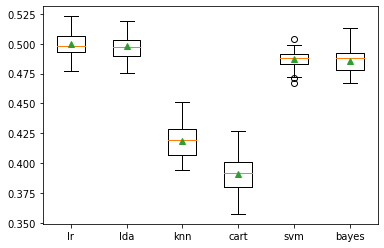

In [21]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [22]:
models

{'lr': LogisticRegression(),
 'lda': LinearDiscriminantAnalysis(),
 'knn': KNeighborsClassifier(),
 'cart': DecisionTreeClassifier(),
 'svm': SVC(),
 'bayes': GaussianNB()}

#### Stack the single models to a combination

In [ ]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('lda', LinearDiscriminantAnalysis()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models


>lr 0.499 (0.010)
>lda 0.498 (0.010)
>knn 0.419 (0.014)
>cart 0.390 (0.016)
>svm 0.487 (0.008)
>bayes 0.486 (0.010)
>stacking 0.500 (0.010)


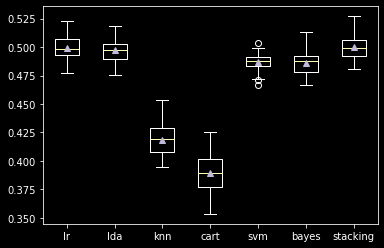

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Neural Network

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [24]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.33,
#                                                     random_state=42)
X_train = X
y_train = y

print(X_train.shape)
print(X_test.shape)


(4896, 6)
(1616, 6)


In [25]:
y_train

FTR
0       1
1       0
2       1
3       1
4       1
...   ...
4891    0
4892    1
4893    1
4894    1
4895    0

[4896 rows x 1 columns]

In [26]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

3


In [27]:
model = Sequential()
# model.add(Dense(500, activation='relu', input_dim=6))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(3, activation='softmax'))

model.add(Dense(500, activation='relu', input_dim=6))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# build the model
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
153/153 [==============================] - 15s 2ms/step - loss: 4.0035 - accuracy: 0.3912
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 1.2803 - accuracy: 0.4258
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 1.2067 - accuracy: 0.4270: 0s - loss: 1.1957 - accuracy
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 1.1184 - accuracy: 0.4639
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 1.1404 - accuracy: 0.4630
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 1.0871 - accuracy: 0.4682
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 1.1127 - accuracy: 0.4430
Epoch 8/20
153/153 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.4636
Epoch 9/20
153/153 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.4799
Epoch 10/20
153/153 [==============================] - 0s 2ms/step - 

In [ ]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.49346405267715454% 
 Error on training data: 0.5065359473228455
Accuracy on test data: 0.48762375116348267% 
 Error on test data: 0.5123762488365173


In [ ]:
# y_pred = [[1 if np.max(j)==i for i in j else 0] for j in pred_test]
y_pred = []
alpha = 0.15
for test in pred_test:
    # list_temp = []
    # for counter, j in enumerate(test):
    #     if np.max(test)==j:
    #         y_pred.append(counter)
    print(test[1])
    if test[1] > test[0]+alpha and test[1] > test[2]:
        y_pred.append(1)
    elif test[2] > test[0]+alpha:
        y_pred.append(2)
    else:
        y_pred.append(0)
        #     list_temp.append(1)
        # else:
        #     list_temp.append(0)
    # y_pred.append(list_temp)
y_pred
y_test_res = []
for test in y_test:
    # list_temp = []
    for counter, j in enumerate(test):
        if np.max(test)==j:
            y_test_res.append(counter)

0.4025957
0.5096868
0.1916968
0.41214964
0.39312974
0.27592123
0.5011132
0.28605524
0.48986998
0.53100866
0.5498683
0.5356362
0.20544308
0.5388363
0.442973
0.48994443
0.48729753
0.5339933
0.33666658
0.5620987
0.30151492
0.5089023
0.52584445
0.51982695
0.20460431
0.49975997
0.56217086
0.5116629
0.55824375
0.44355598
0.57108885
0.386883
0.30002645
0.2908342
0.36400396
0.5487093
0.41460046
0.39012855
0.5337315
0.49574503
0.31167033
0.5125034
0.45029628
0.5224654
0.49996138
0.39392245
0.5158849
0.49552408
0.40400174
0.42644188
0.3242477
0.44222876
0.38818946
0.52269804
0.4260932
0.5194252
0.43223011
0.5112784
0.44427308
0.47520646
0.42491898
0.3976441
0.36145112
0.5278666
0.48839703
0.4487709
0.34091237
0.5501372
0.34885326
0.37352976
0.5981611
0.5738969
0.50263256
0.51331973
0.35485736
0.34157884
0.4973889
0.51906997
0.48320428
0.34445366
0.50182146
0.58708596
0.510682
0.3453043
0.39449576
0.550193
0.13694678
0.42738977
0.48830202
0.50270396
0.3934949
0.45796683
0.2313641
0.24781929
0.513

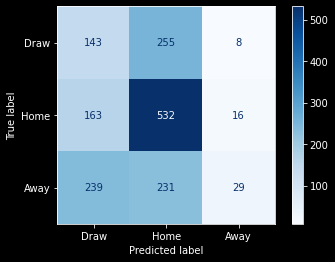

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test_res, y_pred) #, labels=["Draw", "Home", "Away"])
cfd = ConfusionMatrixDisplay(cf, display_labels=["Draw", "Home", "Away"])
cfd.plot(cmap=plt.cm.Blues)

In [ ]:
# class_names = {
#     'Away'
#     ,'Draw',
#     'Home'
# }
# # Plot non-normalized confusion matrix
# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
# models['lr'],
#         X_test,
#         y_test,
#         #display_labels=class_names,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

In [ ]:
y

FTR
0       1
1       0
2       1
3       1
4       1
...   ...
4891    0
4892    1
4893    1
4894    1
4895    0

[4896 rows x 1 columns]

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import backend, callbacks
#create model
model = Sequential()

#get number of columns in training data
n_cols_2 = X.shape[1]
print(n_cols_2)

#add layers to model
model.add(Dense(500, activation='relu', input_dim=6))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

#compile model using accuracy to measure model performance
# model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'mse'], metrics=['accuracy'])
model.compile(metrics=['accuracy'], optimizer='rmsprop',
              loss='categorical_crossentropy')
# K.set_value(model.optimizer.learning_rate, 0.01)

# early_stopping_monitor = EarlyStopping(patience=3)

# es = callbacks.EarlyStopping(monitor='val_loss',
#                                    mode='min',
#                                    patience=10,
#                                    restore_best_weights=True)



search = RandomizedSearchCV(model,
                            n_iter=500,
                            scoring='accuracy',
                            random_state=1)
history = search.fit(X_train, y_train,  epochs=20, validation_split=0.3) #, callbacks=[early_stopping_monitor]) #callbacks=[es],

6


TypeError: __init__() missing 1 required positional argument: 'param_distributions'

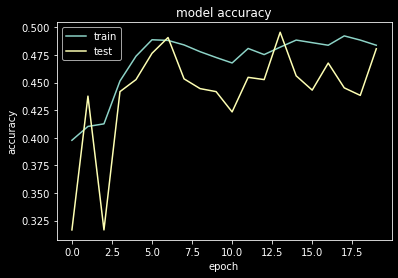

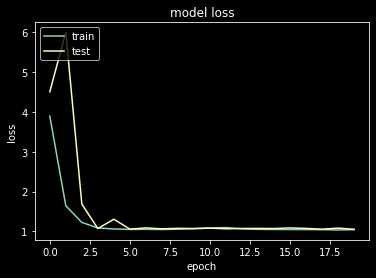

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

# summarize history for loss

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
models['lr']

LogisticRegression()

In [ ]:
results

[array([0.51632653, 0.48723187, 0.50459653, 0.48518897, 0.50868233,
        0.49489796, 0.50970378, 0.49336057, 0.49642492, 0.50766088,
        0.49285714, 0.48621042, 0.49336057, 0.51378958, 0.49948927,
        0.50510204, 0.49029622, 0.49336057, 0.49131767, 0.51072523,
        0.5       , 0.50868233, 0.49438202, 0.49131767, 0.49642492,
        0.49795918, 0.52298264, 0.49642492, 0.49846782, 0.49540347,
        0.47755102, 0.49336057, 0.50970378, 0.51481103, 0.50561798,
        0.51326531, 0.48927477, 0.49336057, 0.51174668, 0.49029622,
        0.50204082, 0.51378958, 0.49336057, 0.50051073, 0.47906027,
        0.49795918, 0.48621042, 0.50663943, 0.50561798, 0.49846782]),
 array([0.51530612, 0.48518897, 0.50868233, 0.48621042, 0.49948927,
        0.49489796, 0.50153218, 0.49131767, 0.49948927, 0.50868233,
        0.48979592, 0.48621042, 0.49336057, 0.51378958, 0.49438202,
        0.50306122, 0.48927477, 0.49233912, 0.48927477, 0.50766088,
        0.50306122, 0.50153218, 0.49846782, 0.